## 1. Importing Dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
def plot_timeseries_figure(predicted_data, actual_data, time, predicted = True):
    if predicted == True:  
        plt.figure(figsize=(15,3))  
        plt.ylim(0,0.8)   
        plt.plot(time, actual_data, label="x",color="orange",lw=1.1)
        plt.plot(time, predicted_data, label="x_pred",ls="--" , color='blue', lw=1.1)  

    else: 
        plt.figure(figsize=(15, 1.6))
        plt.plot(predicted_data,marker="o",label="X",color="red")
        plt.title("mu = {}".format(time))
        plt.xlim(20, 101)
        plt.ylim(-0.1,1.1)
        plt.grid(True)
    plt.ylabel("x")
    plt.xlabel("time")
    plt.legend(loc='upper right')
    plt.show()

## 3. Logistic map data

$$x_{t+1}=\mu x_t (1-x_t)$$

The Logistic map is a simple 1 dimensional map equation that is usd to model poulation dynaics. We study this sytem because it shows rich variation in behaviouwhen we change the order parameter $\mu$.

In [4]:
# mu_val = np.linspace(0, 4, 100000)
# m = 0.7
# Mu_data = []
# X_data = []

# for mu in mu_val:
#     x = np.random.random()
#     for n in range(1001):
#         x = (mu * x) * (1 - x)
#     for l in range(11):
#         x = (mu * x) * (1 - x)
#         Mu_data.append(mu)
#         X_data.append(x)

# plt.figure(figsize=(10, 5))
# plt.plot(Mu_data, X_data, ls='', marker=',', color="black")
# plt.title('Period Doubling')
# plt.xlabel(r'$\mu$')
# plt.ylabel('$x$')
# plt.xlim(2.9, 4)
# plt.show()

In [5]:
def logistic_map(mu, x_0):
    data_length = 36000

    t = np.linspace(0, data_length, data_length)
    x = x_0
    x_data = np.zeros_like(t)
    x_data[0] = x_0


    for i in range(1,data_length):
        x_new = mu * x * (1 - x)
        x  = x_new
        x_data[i] = x_new

    return x_data

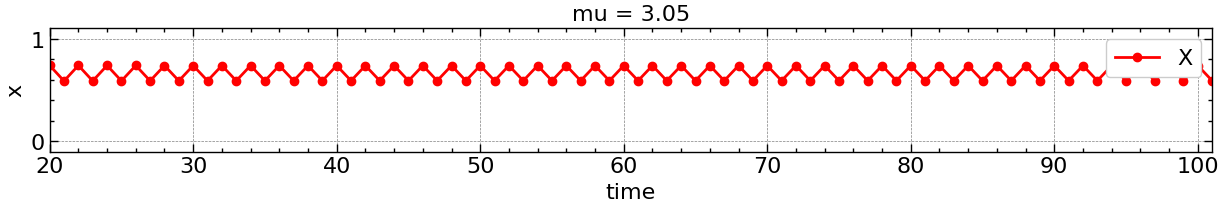

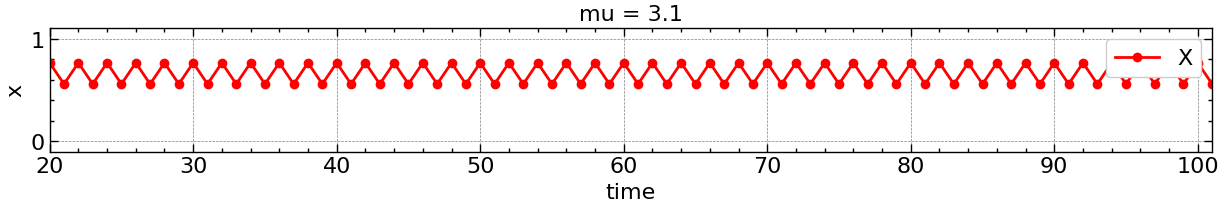

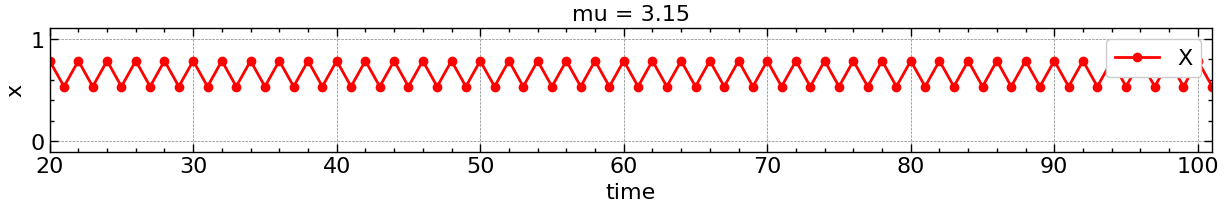

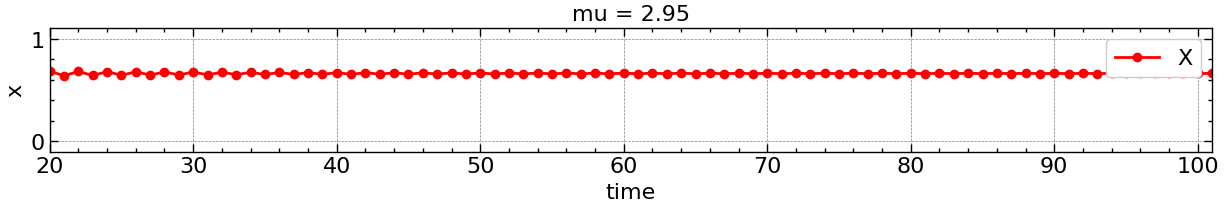

(1, 144000)


In [6]:
mu_values = [3.05,3.10,3.15,2.95]

data_x_list = []

for mu in mu_values:
    x_0 = float(0.8)
    x_data = logistic_map(mu, x_0)
    data_x_list.append(x_data)
    plot_timeseries_figure(x_data,actual_data=None,time=mu,predicted=False)

stacked_x1 = np.transpose(np.hstack(data_x_list))                                

stacked_total = np.expand_dims(stacked_x1 ,axis=0)         
print(stacked_total.shape)

# 3. Crossing of Eigen values at positive side

We use a Bayesian Otimization algorithim to find the set of hyperparameters which gives the least NRMSE value

In [8]:
from PaResPy import ReservoirComputer

training_data,valid_data,train_without_transient = ReservoirComputer.train_test_split(stacked_total)

eps_train = [3.05,3.10,3.15]

dim_reservoir = 100
rho = 0.3037
sigma = 0.00085
k_b = 0.0492
alpha = 1     
model = ReservoirComputer(1, dim_reservoir, rho, sigma, k_b, alpha) 
model.train(training_data, train_without_transient,eps_train)
predicted_data,_ = model.predict(mu,len(valid_data), valid_data, train_without_transient)
total_var = np.var(predicted_data)
NRMSE = np.sqrt(np.mean((valid_data[:] - predicted_data[:]) ** 2) / total_var)
NRMSE

 The training data shape : (48000, 1)
 The testing data shape : (16000, 1)


2.4856089542997193

The NRMSE value of mu value 3.05 : 0.07159678703412682


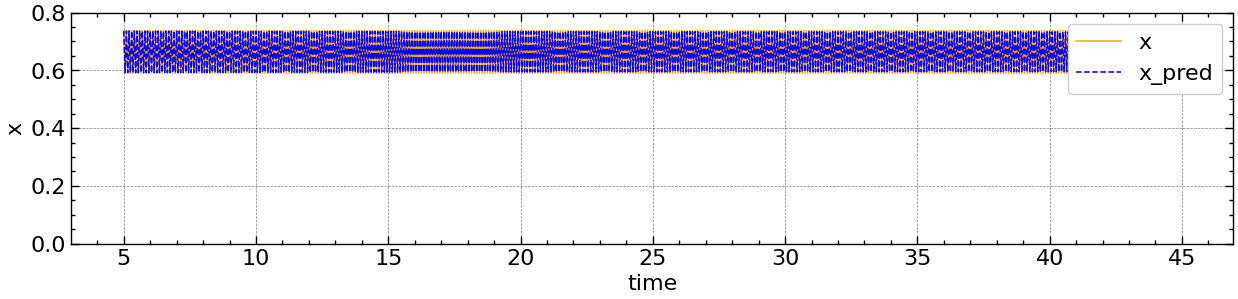

The NRMSE value of mu value 3.1 : 0.0421397418162309


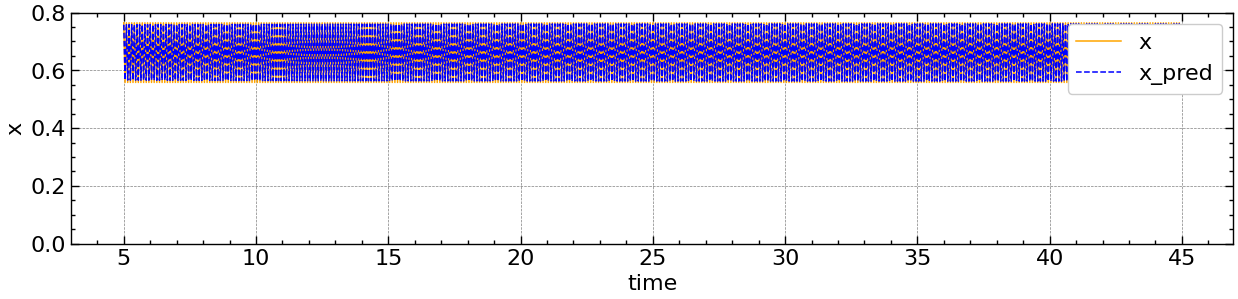

The NRMSE value of mu value 2.8 : 41.08419388108463


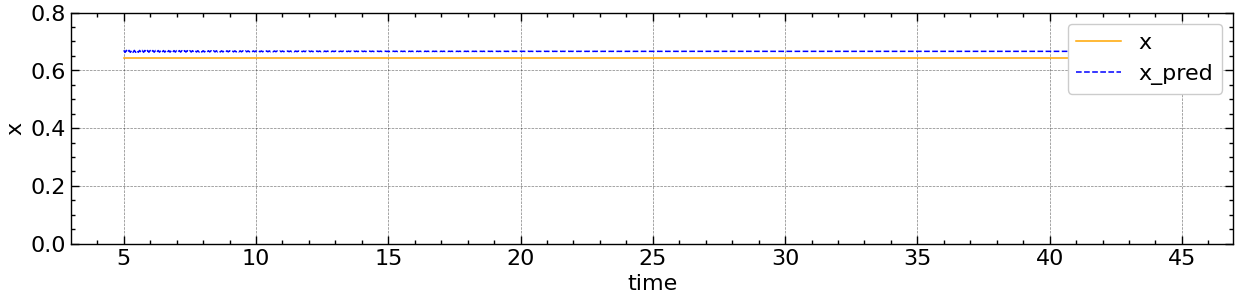

In [9]:
mu_values = np.array([3.05, 3.1, 2.8])
for mu in mu_values:
    mu_data = logistic_map(mu, x_0)
    valid_data = np.expand_dims(mu_data[-16000:],axis=1)  
    predicted_data, Res_test_total = model.predict(mu,len(valid_data), valid_data, train_without_transient)

    #Checking NRMSE
    total_var = np.var(predicted_data)
    NRMSE = np.sqrt(np.mean((valid_data[:] - predicted_data[:]) ** 2) / total_var)
    print("The NRMSE value of mu value {} :".format(mu), NRMSE)

    #Checking the plots
    dt = 0.05
    x_actual_data = valid_data
    x_pred_data = predicted_data
    timeaxis = np.arange(0, (valid_data.shape[0])*dt, dt)
    plot_timeseries_figure(x_pred_data[100:900],x_actual_data[100:900],timeaxis[100:900])

## Map Analysis for fixed point 

In [10]:
A, W_in, W_out, W_b = model.get_weights()
eb = 0
alpha = 1
Lambda = A + np.matmul(W_in, W_out)
Omega = k_b * W_b

from eigen_analysis import eigenvalues

epsilon_list=np.array([2.9, 3.01, 3.2])
analysis_model = eigenvalues(eb,alpha,Lambda,Omega,dim_reservoir)
eig_array = analysis_model.eigen_values(epsilon_list,int_guess=0.65)

c:\Users\User\Desktop\Coding\Research Work\eigen_analysis.py:57: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  solution = fsolve(func, initial_guess)


[-0.07097098 -0.24565711  0.53502139 -0.42920612  0.30049738 -0.11615276
  0.03385294  0.0818761  -0.30829774 -0.6860072 ]
[-0.06654284 -0.24431697  0.54306461 -0.4354602   0.30517192 -0.11912258
  0.02782552  0.07751453 -0.30677572 -0.69629732]
[-0.06024313 -0.242551    0.55817644 -0.44712737  0.31523471 -0.12450043
  0.01886925  0.07146476 -0.30629325 -0.71566972]


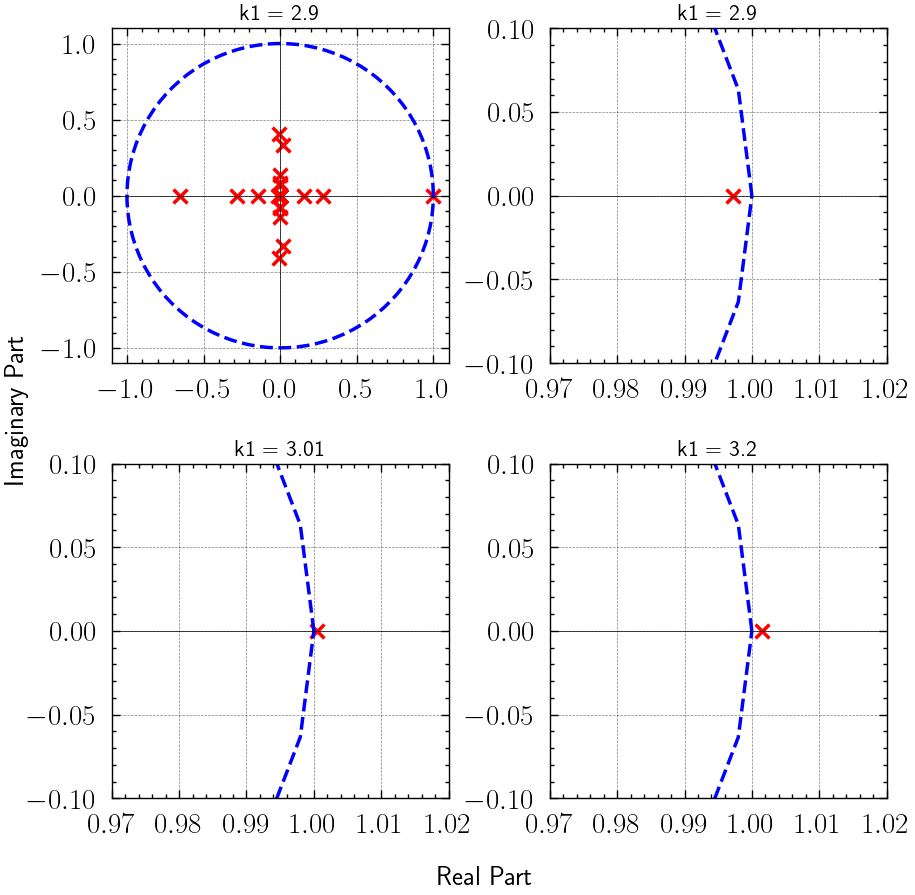

In [11]:
x_lim = [0.97,1.02, 6]
y_lim = [-0.1, 0.1, 5]

analysis_model.Plot_eig_values(eig_array,epsilon_list,x_lim,y_lim)

## Comparative Bifurcation point

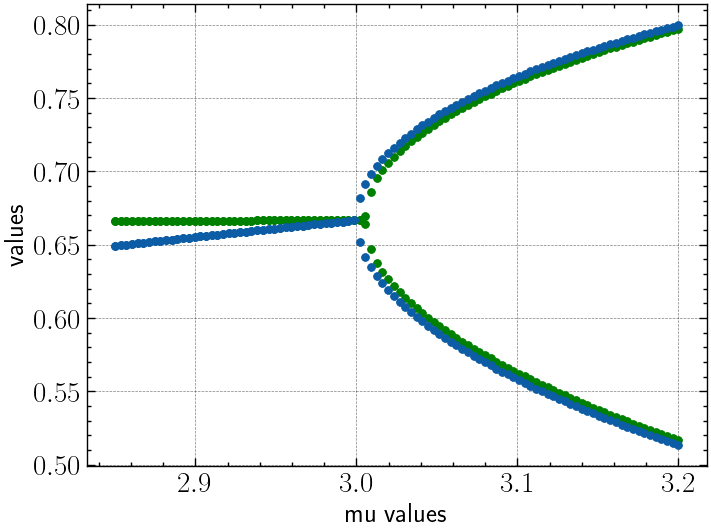

In [12]:
mu_values = np.linspace(2.85,3.2,100)

x_1_values = []
fixed_point = []
mu_data = []
transient = 20000

for mu in mu_values:
    x = 0.6
    r_state = np.ones(dim_reservoir) * 0.6
    for i in range(transient):
        x = x * mu * (1 - x)
        r_state = ((1- alpha)* r_state) + alpha* np.tanh(np.matmul(Lambda, r_state) + k_b * W_b * (mu - eb))
    
    for i in range(4):
        x = x * mu * (1 - x)
        r_state = ((1- alpha)* r_state) + alpha* np.tanh(np.matmul(Lambda, r_state) + k_b * W_b * (mu - eb))
        prediction = np.transpose(np.dot(W_out, r_state))
        x_1_values.append(x)
        fixed_point.append(prediction)
        mu_data.append(mu)

plt.scatter(mu_data,fixed_point,marker='.',label="PARC values",color="green")
plt.scatter(mu_data,x_1_values,marker='.',label="Logistic map values")
plt.xlabel("mu values")
plt.ylabel(" values")
plt.show()

# Crossing of Eigen values at negative side

In [14]:
dim_reservoir = 150
rho = 0.4817
sigma = 0.00730
k_b = 0.0604
alpha = 1     
model = ReservoirComputer(1, dim_reservoir, rho, sigma, k_b, alpha) 
model.train(training_data, train_without_transient,eps_train)
predicted_data,_ = model.predict(mu,len(valid_data), valid_data, train_without_transient)
total_var = np.var(predicted_data)
NRMSE = np.sqrt(np.mean((valid_data[:] - predicted_data[:]) ** 2) / total_var)
NRMSE

1.0087161958740425

The NRMSE value of mu value 2.95 : 1.0397315202082718


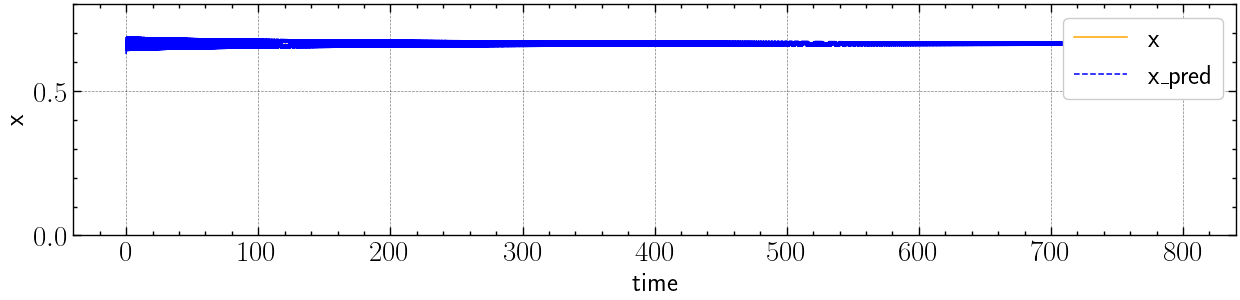

In [15]:
mu = 2.95
mu_data = logistic_map(mu, x_0)
valid_data = np.expand_dims(mu_data[-16000:],axis=1)  
predicted_data, Res_test_total = model.predict(mu,len(valid_data), valid_data, train_without_transient)

#Finding NRMSE
total_var = np.var(predicted_data)
NRMSE = np.sqrt(np.mean((valid_data[:] - predicted_data[:]) ** 2) / total_var)
print("The NRMSE value of mu value {} :".format(mu), NRMSE)

#checking the plots
dt = 0.05
x_actual_data = valid_data
x_pred_data = predicted_data
timeaxis = np.arange(0, (valid_data.shape[0])*dt, dt)
plot_timeseries_figure(x_pred_data,x_actual_data,timeaxis)

## Map Analysis

In [16]:
A, W_in, W_out, W_b = model.get_weights()
eb = 0
alpha = 1
Lambda = A + np.matmul(W_in, W_out)
Omega = k_b * W_b

In [17]:

from eigen_analysis import eigenvalues

epsilon_list=np.array([2.9, 3.01, 3.2])
analysis_model = eigenvalues(eb,alpha,Lambda,Omega,dim_reservoir)
eig_array = analysis_model.eigen_values(epsilon_list,int_guess=0.65)

[ 0.46225196  0.25960323 -0.46791813  0.3925708  -0.30873609 -0.03462
 -0.50430085 -0.48480296  0.61195233 -0.0265221 ]
[ 0.4719945   0.26136397 -0.46414958  0.38787662 -0.30648093 -0.03775237
 -0.51250456 -0.49122104  0.61724763 -0.03656553]
[ 0.48851485  0.26429928 -0.45735505  0.37950286 -0.30238964 -0.04318694
 -0.52635377 -0.50205752  0.62610382 -0.05397329]


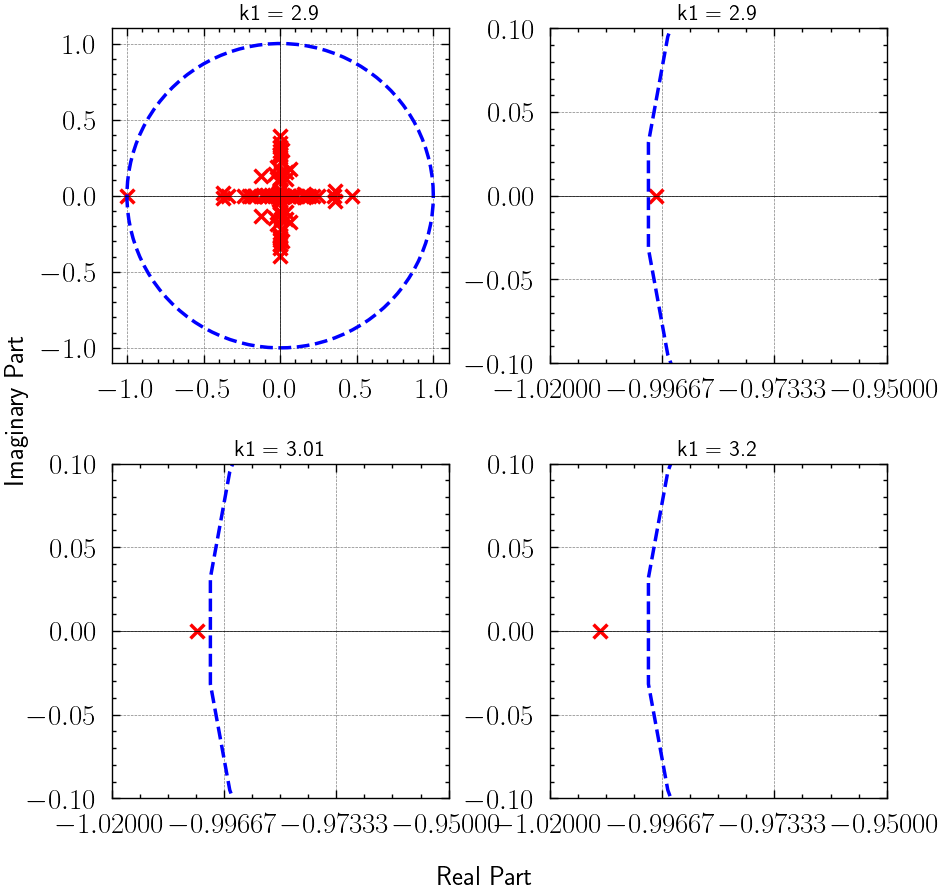

In [18]:
x_lim = [-1.02,-0.95, 4]
y_lim = [-0.1, 0.1, 5]

analysis_model.Plot_eig_values(eig_array,epsilon_list,x_lim,y_lim)

## Comparative Bifurcation Plot

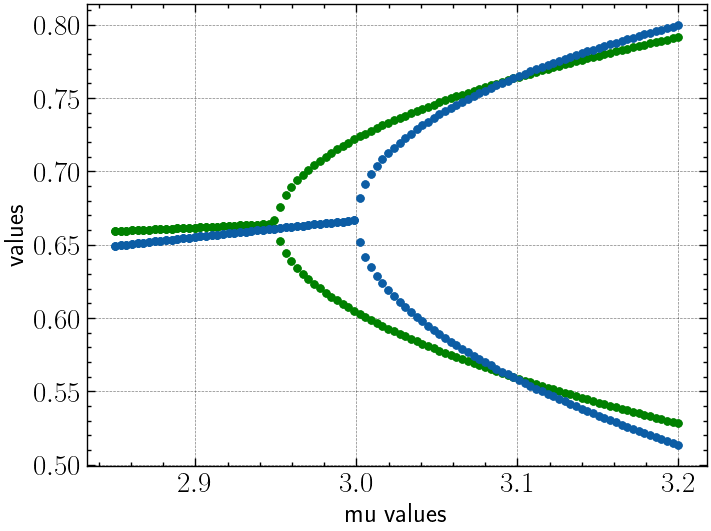

In [19]:
mu_values = np.linspace(2.85,3.2,100)

x_1_values = []
fixed_point = []
mu_data = []
transient = 20000

for mu in mu_values:
    x = 0.6
    r_state = np.ones(dim_reservoir) * 0.6
    for i in range(transient):
        x = x * mu * (1 - x)
        r_state = ((1- alpha)* r_state) + alpha* np.tanh(np.matmul(Lambda, r_state) + k_b * W_b * (mu - eb))
    
    for i in range(4):
        x = x * mu * (1 - x)
        r_state = ((1- alpha)* r_state) + alpha* np.tanh(np.matmul(Lambda, r_state) + k_b * W_b * (mu - eb))
        prediction = np.transpose(np.dot(W_out, r_state))
        x_1_values.append(x)
        fixed_point.append(prediction)
        mu_data.append(mu)

plt.scatter(mu_data,fixed_point,marker='.',label="PARC values",color="green")
plt.scatter(mu_data,x_1_values,marker='.',label="Logistic map values")
plt.xlabel("mu values")
plt.ylabel(" values")
plt.show()